<a href="https://colab.research.google.com/github/Varun51838/Air-Passengers/blob/main/Decomposition_%26_Forecasting_AirPassengers_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Patterns in a Time Series**

Any time series visualization may consist of the following components: **Base Level + Trend + Seasonality + Error**

**1. Trend :**
A trend is observed when there is an increasing or decreasing slope observed in the time series.

**2. Seasonality :**
A seasonality is observed when there is a distinct repeated pattern observed between regular intervals due to seasonal factors. It could be because of the month of the year, the day of the month, weekdays or even time of the day.

**3. Error or Residual :**
These are the left over after removing Trend & Seasonality from the Base level.

However, It is not mandatory that all time series must have a trend and/or seasonality. A time series may not have a distinct trend but have a seasonality and vice-versa.

In [ ]:
# Import required libraries
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read dataset & check top 5 rows
df = pd.read_csv('AirPassengers.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
# Rename the columns to Date and Number of Passengers
df.columns = ['Date', 'Passengers']
df.head()

,Date,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


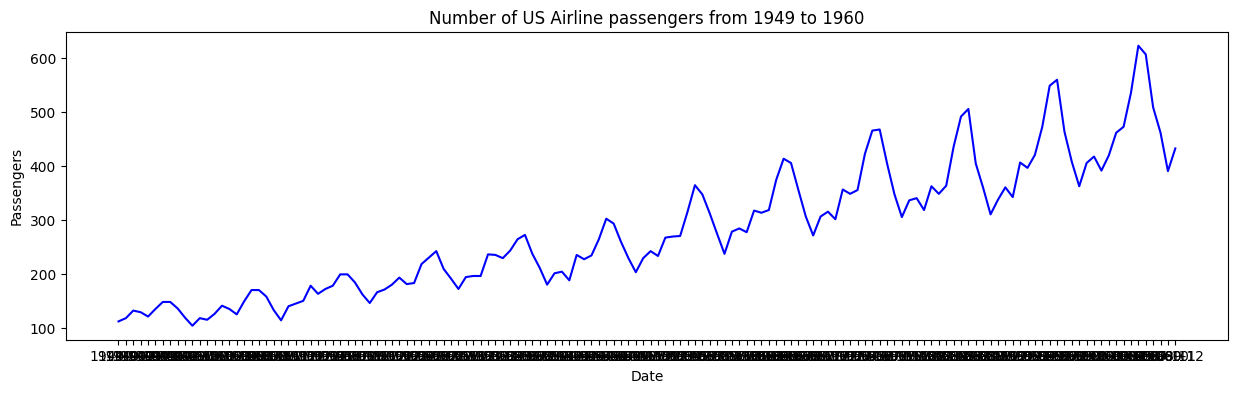

In [ ]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Passengers', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df['Date'], y=df['Passengers'], title='Number of US Airline passengers from 1949 to 1960')

**Additive and Multiplicative Time Series**

We may have different combinations of trends and seasonality. Depending on the nature of the trends and seasonality, a time series can be modeled as an additive or multiplicative time series. Each observation in the series can be expressed as either a sum or a product of the components.

**Additive time series:
Value = Base Level + Trend + Seasonality + Error**

**Multiplicative Time Series:
Value = Base Level x Trend x Seasonality x Error**

<Figure size 640x480 with 0 Axes>

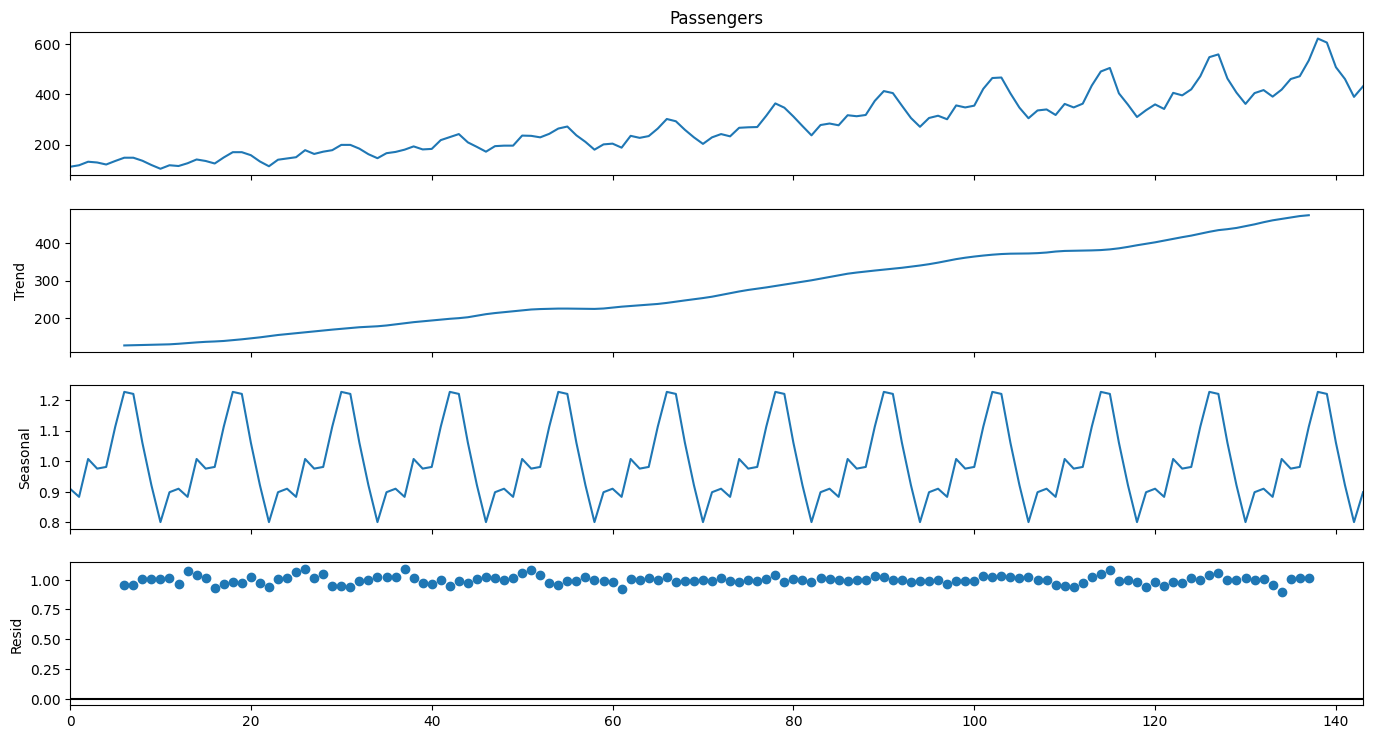

In [ ]:
# Decompose the above time series data assuming it is multiplicative
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['Passengers'], model='multiplicative', period=12)
fig = plt.figure()
fig = result.plot()
fig.set_size_inches(15, 8)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:84: RuntimeWarning: overflow encountered in matmul
  return err.T @ err


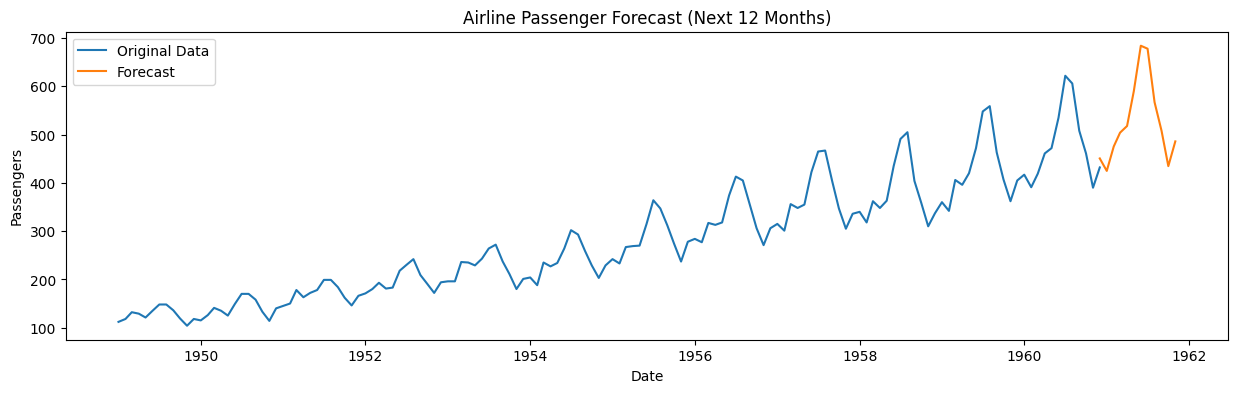

,0
144,450.675761
145,424.819099
146,475.496170
147,504.076315
148,517.872517
149,590.146615
150,684.227866
151,678.031870
152,567.112279
153,507.823915


In [ ]:
# Predict Airline Passengers for next 12 months
# We will use Holtwinters Exponential Triple Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Forecasting using Holt-Winters method
model = ExponentialSmoothing(df['Passengers'], trend='mul', seasonal='mul', seasonal_periods=12)
fit = model.fit()
forecast = fit.forecast(12)  # Forecast the next 12 months

# Convert 'Date' column to datetime objects with explicit timezone
df['Date'] = pd.to_datetime(df['Date']).dt.tz_localize(None)

# Plotting the forecast
plt.figure(figsize=(15, 4))
plt.plot(df['Date'], df['Passengers'], label='Original Data')

# Generate date range with explicit timezone set to None
future_dates = pd.date_range(start='1960-12-01', periods=12, freq='MS', tz=None)
plt.plot(future_dates, forecast, label='Forecast')

plt.xlabel('Date')
plt.ylabel('Passengers')
plt.title('Airline Passenger Forecast (Next 12 Months)')
plt.legend()
plt.show()

forecast